# Lecture 20: Decision Trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from IPython.display import Image
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781449369880/files/assets/malp_01in02.png", width=600)

In [ ]:
iris = load_iris(as_frame=True)

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [ ]:
set(y_iris)

{0, 1, 2}

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

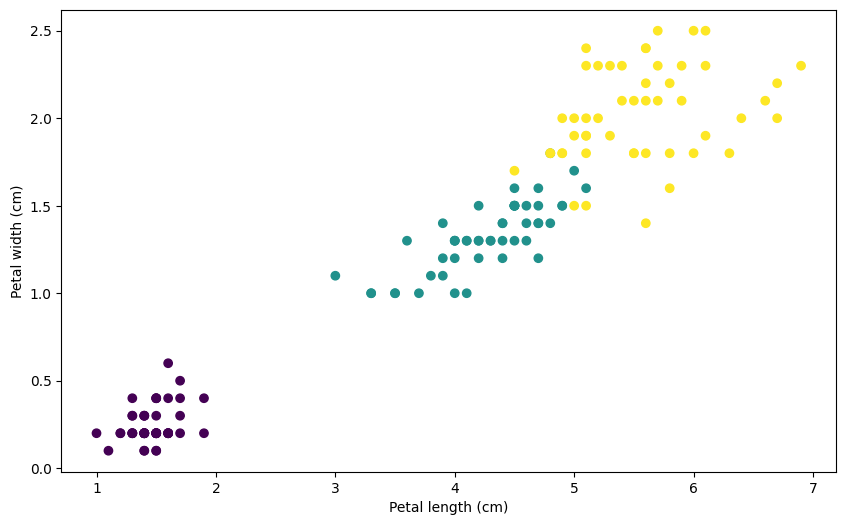

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

Again, Decision trees are kind like a game of 20 Questions.

The question is how to start a root.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

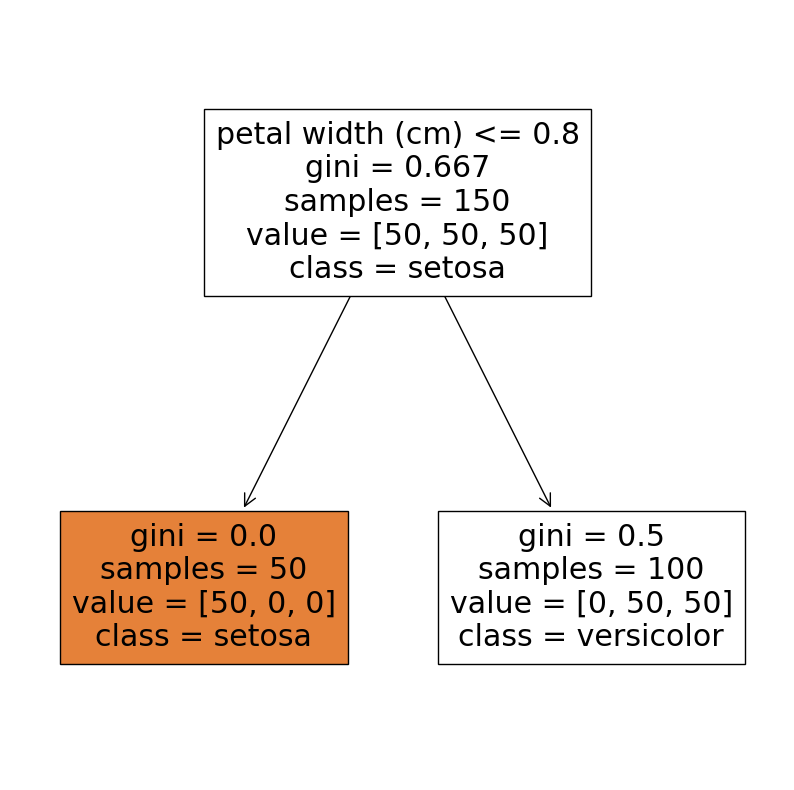

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=1)

# Fit the model to the data
tree_clf.fit(X_iris, y_iris)

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.show()

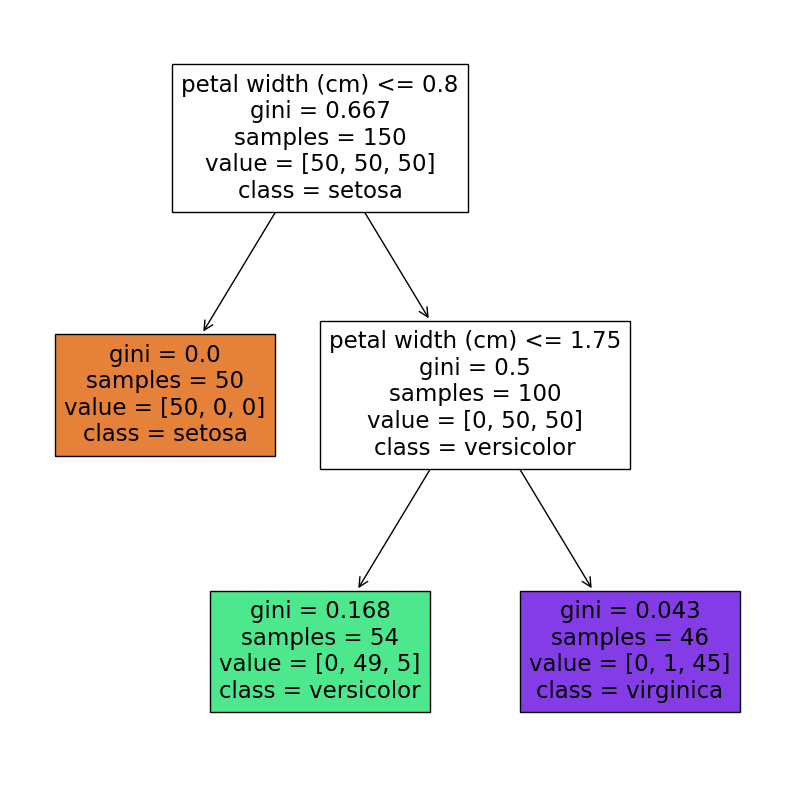

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth= 2)

# Fit the model to the data
tree_clf.fit(X_iris, y_iris)

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.show()

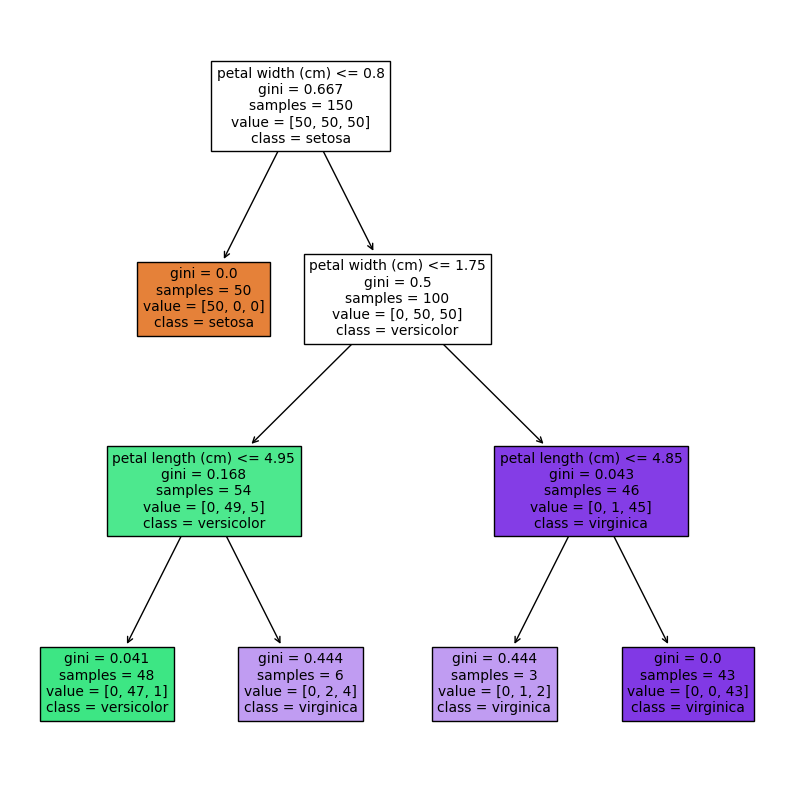

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth= 3)

# Fit the model to the data
tree_clf.fit(X_iris, y_iris)

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.show()

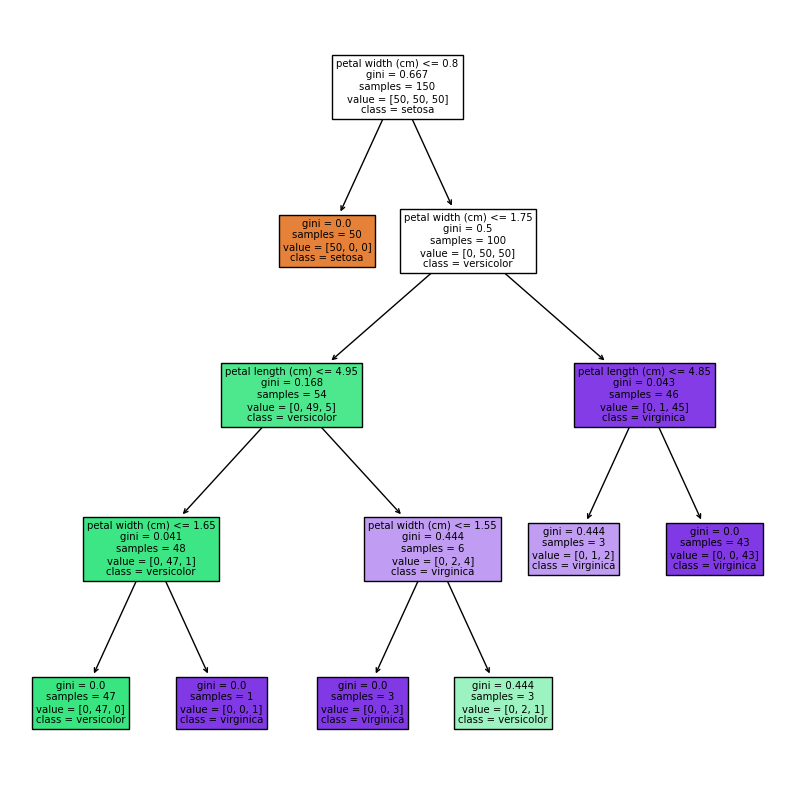

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth= 4)

# Fit the model to the data
tree_clf.fit(X_iris, y_iris)

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.show()

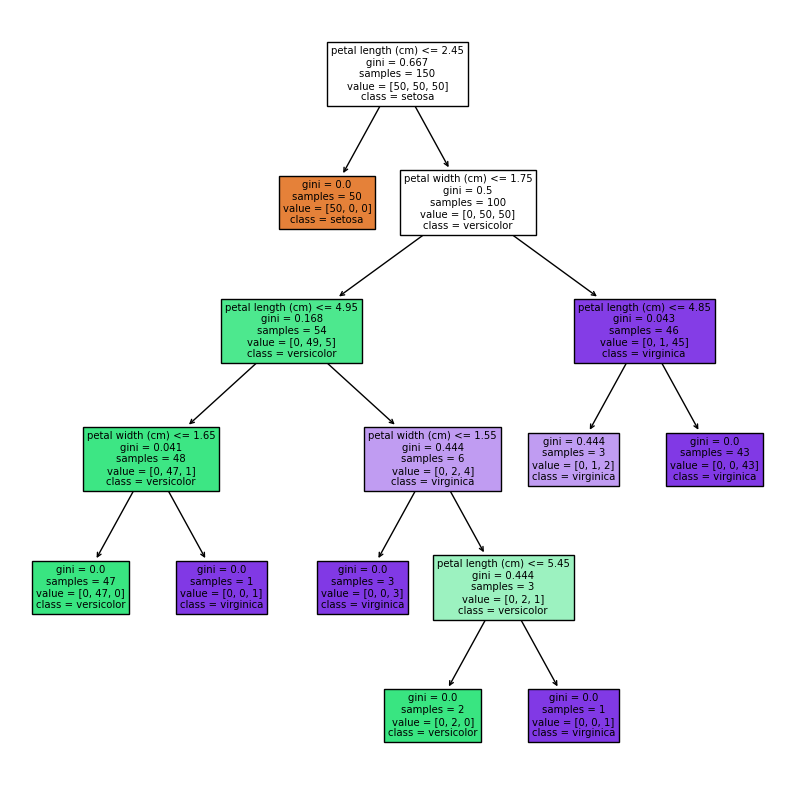

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth= 5)

# Fit the model to the data
tree_clf.fit(X_iris, y_iris)

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names)
plt.show()

This recursive process yields a binary tree of decisions, with each node containing a test

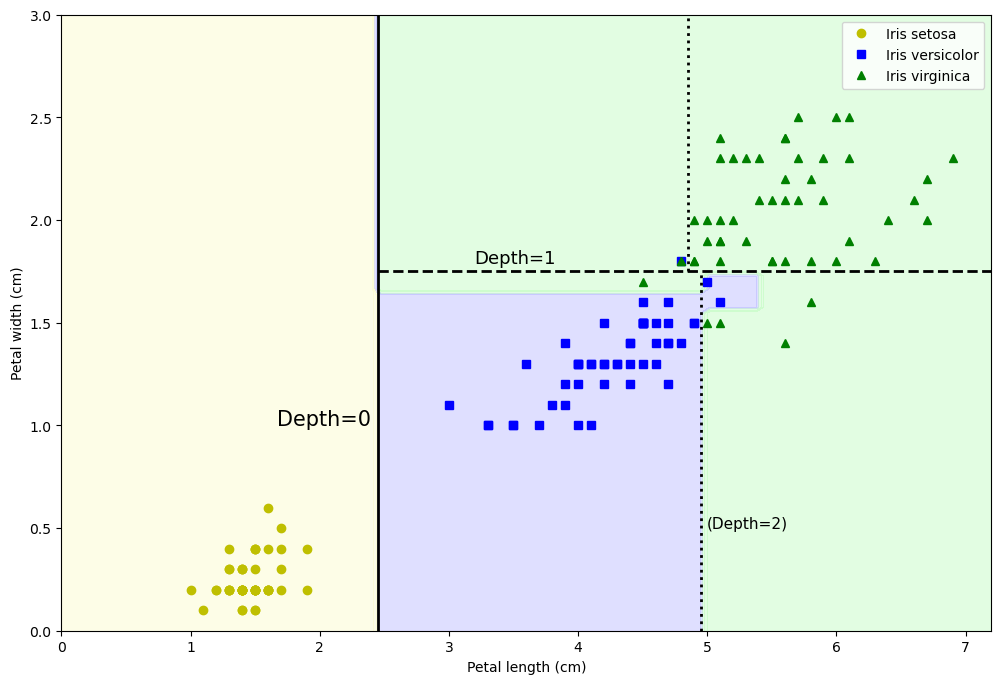

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(12, 8))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

## Controlling complexity of decision trees

What is the potential concern when we grow the trees to greater depths?

You can see the role of `max_depth` above

We'll train one decision tree another with `min_samples_leaf`

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

print(X_moons[:5])
print(y_moons[:5])

[[-1.10598226 -0.25656957]
 [ 0.56410443  0.84068113]
 [ 1.20954578 -0.55310671]
 [ 0.10838923  0.60461951]
 [ 0.05232441  0.52046138]]
[0 0 1 1 1]


In [ ]:
# This is just a sample image, not from the data
Image(url="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781449369880/files/assets/malp_0222a.png", width=600)

Set `min_samples_leaf` in the `DecisionTreeClassifier`

In [ ]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

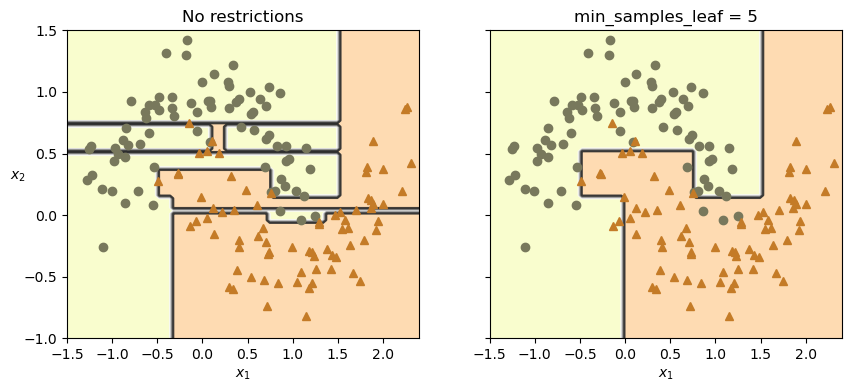

In [ ]:
import numpy as np

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

The unregularized model on the left is clearly overfitting, and the regularized model on the right will probably generalize better

We can verify this by evaluating both trees on a test set generated using a different random seed

In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [ ]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

We have a input and output pair: X_quad and y_quad

In [ ]:
X_quad[:10]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258]])

In [ ]:
y_quad[:10]

array([[-0.00126044],
       [ 0.20894973],
       [ 0.061148  ],
       [-0.00812529],
       [ 0.16496754],
       [ 0.13018559],
       [ 0.16550751],
       [ 0.15049881],
       [-0.0141428 ],
       [ 0.06297131]])

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=1, random_state=42)

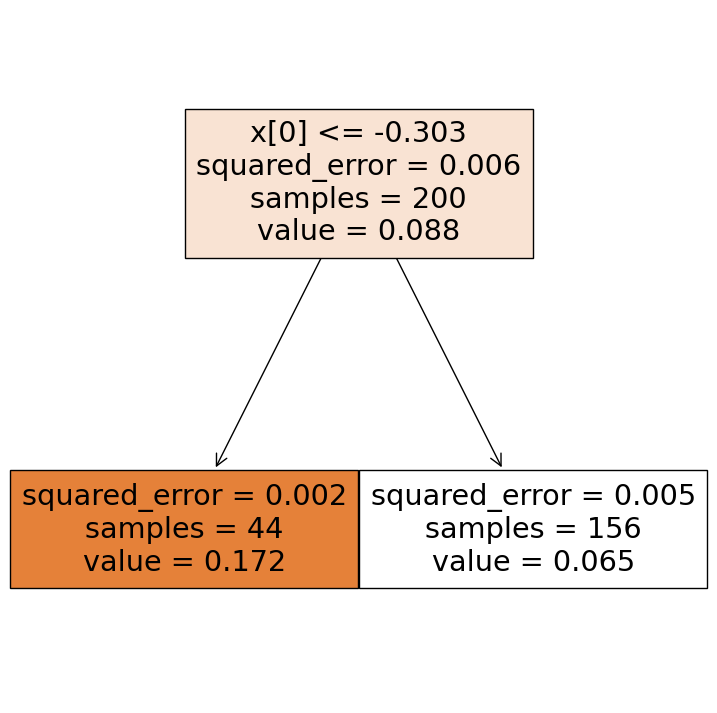

In [ ]:
plt.figure(figsize=(9,9))
plot_tree(tree_reg, filled=True)
plt.show()

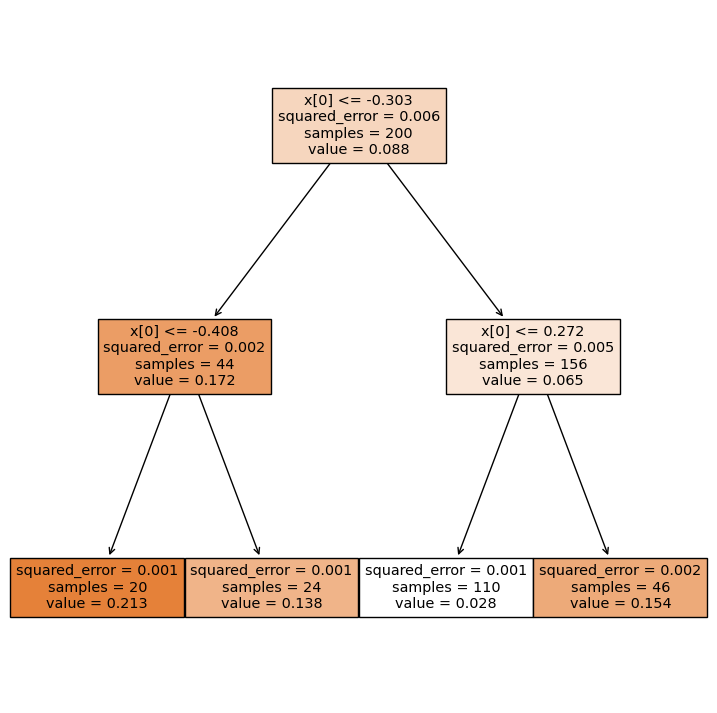

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)
plt.figure(figsize=(9,9))
plot_tree(tree_reg, filled=True)
plt.show()

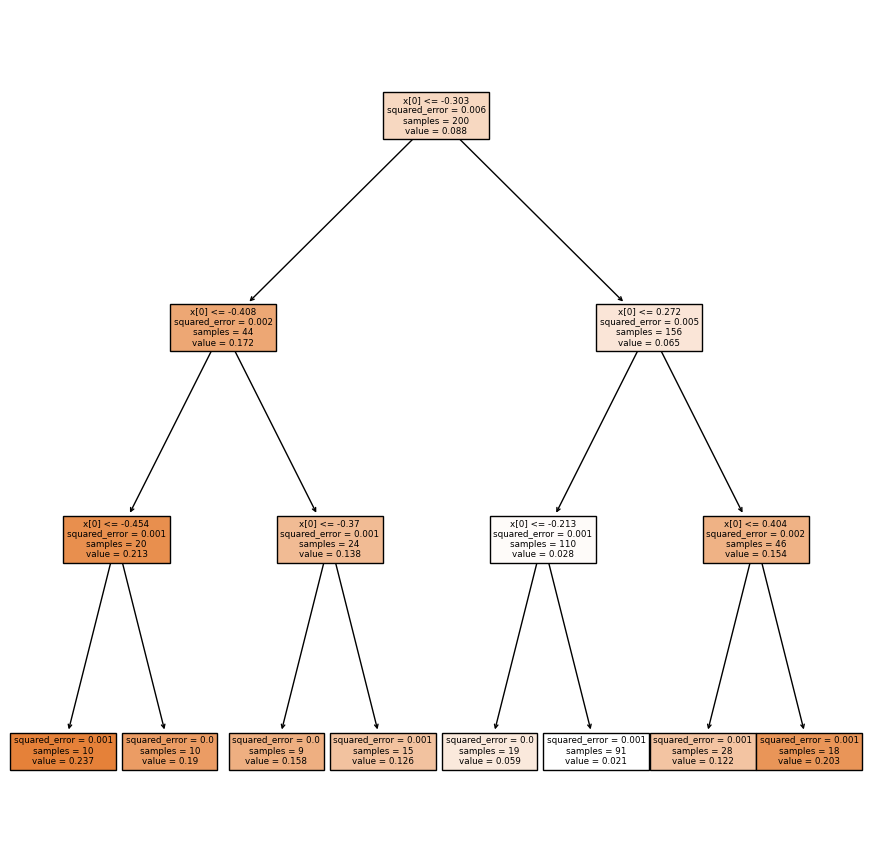

In [ ]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)
plt.figure(figsize=(11,11))
plot_tree(tree_reg2, filled=True)
plt.show()

This tree looks very similar to the classification tree you built earlier.

The main difference is that instead of predicting a class in each node, it predicts **a value**.

- For example, suppose you want to make a prediction for a new instance with $x_1 = 0.2$ and make a prediction.

This prediction is the average target value of the 110 training instances associated with this leaf node, and it results in a mean squared error equal to 0.001 over these 110 instances.

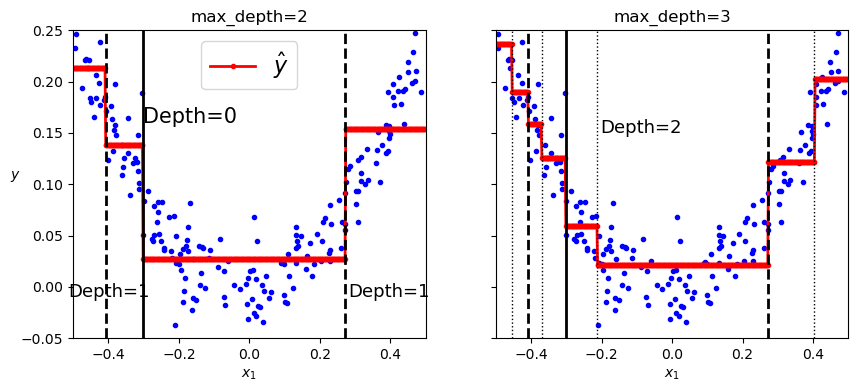

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")
plt.show()

Notice how the predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

The CART algorithm works as described earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

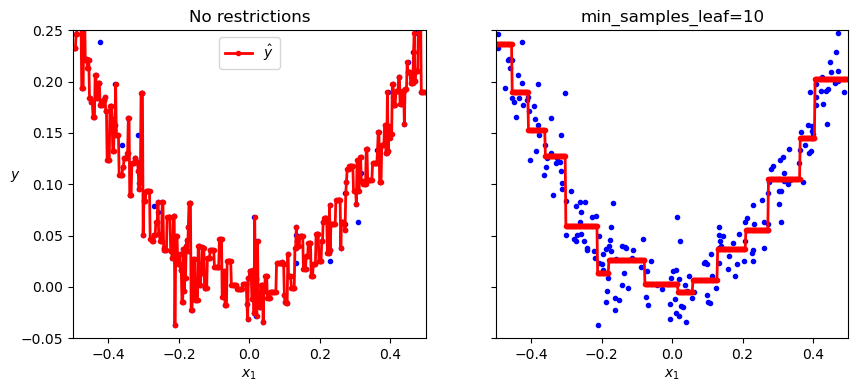

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

- Just like for classification tasks, decision trees are prone to overfitting when dealing with regression tasks.
- Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left.
- These predictions are obviously overfitting the training set very badly.
- Just setting `min_samples_leaf=10` results in a much more reasonable model, represented on the right.

## More features?

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.DESCR.split('\n')

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- As expected, the accuracy on the training set is 100%
    — because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.
- The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.
- If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Feature importance in trees

- Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree
- The most commonly used summary is **feature importance**, which rates how important each feature is for the decision a tree makes
- It is a number between 0 and 1 for each feature, where 0 means *not used at all* and 1 means *perfectly predicts the target*
- The feature importances always sum to 1:

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


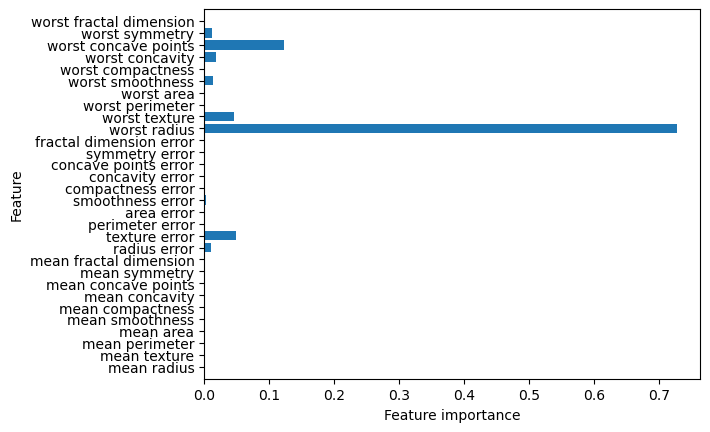

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- Note that if a feature has a low value in `feature_importance_`, it doesn’t mean that this feature is uninformative.
- It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

- In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of.
- The feature importances tell us that `worst radius` is important, but not whether a high radius is indicative of a sample being benign or malignant.

## Strengths, weaknesses, and parameters

- The parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed.
- Usually, picking one of the pre-pruning strategies, either `max_depth`, `max_leaf_nodes`, or `min_samples_leaf`, sufficient to prevent overfitting.

- Decision trees have two advantages over many of the algorithms we’ve discussed so far
    - the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees)
    - the algorithms are completely invariant to scaling of the data.
- As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms.
- In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.